# Example 20 - Sill



This example will show how to convert the geological map below using ``GemGIS`` to a `GemPy` model. This example is based on digitized data. The area is 1381 m wide (W-E extent) and 1768 m high (N-S extent). The vertical model extent varies between -500 m and 250 m. The model represents a wedge shaped sill that was encountered in boreholes. 

The map has been georeferenced with QGIS. The stratigraphic boundaries were digitized in QGIS. Strikes lines were digitized in QGIS as well and will be used to calculate orientations for the `GemPy` model. The contour lines were also digitized and will be interpolated with `GemGIS` to create a topography for the model. 

Map Source: An Introduction to Geological Structures and Maps by G.M. Bennison

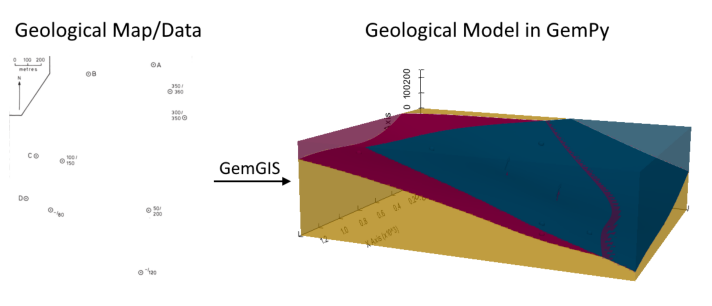

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../../docs/getting_started/images/cover_example20.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

## Licensing

Computational Geosciences and Reservoir Engineering, RWTH Aachen University, Authors: Alexander Juestel. For more information contact: alexander.juestel(at)rwth-aachen.de


This work is licensed under a Creative Commons Attribution 4.0 International License (http://creativecommons.org/licenses/by/4.0/)

## Import GemGIS

If you have installed ``GemGIS`` via pip and conda, you can import ``GemGIS`` like any other package. If you have downloaded the repository, append the path to the directory where the ``GemGIS`` repository is stored and then import ``GemGIS``. 

In [2]:
import warnings
warnings.filterwarnings("ignore")
import gemgis as gg

## Importing Libraries and loading Data

All remaining packages can be loaded in order to prepare the data and to construct the model. The example data is downloaded from an external server using `pooch`. It will be stored in a data folder in the same directory where this notebook is stored.  

In [3]:
import geopandas as gpd
import rasterio 

In [4]:
file_path = 'data/example20/'
gg.download_gemgis_data.download_tutorial_data(filename="example20_sill.zip", dirpath=file_path)

## Creating Digital Elevation Model from Contour Lines

The digital elevation model (DEM) will be created by creating a NumPy array containing the height values. For this example, the height is 0, meaning that a flat topography at sea level is present. 



### Creating the raster

In [5]:
import numpy as np
topo_raster = np.zeros((138, 176))

### Plotting the raster

(0.0, 1768.0)

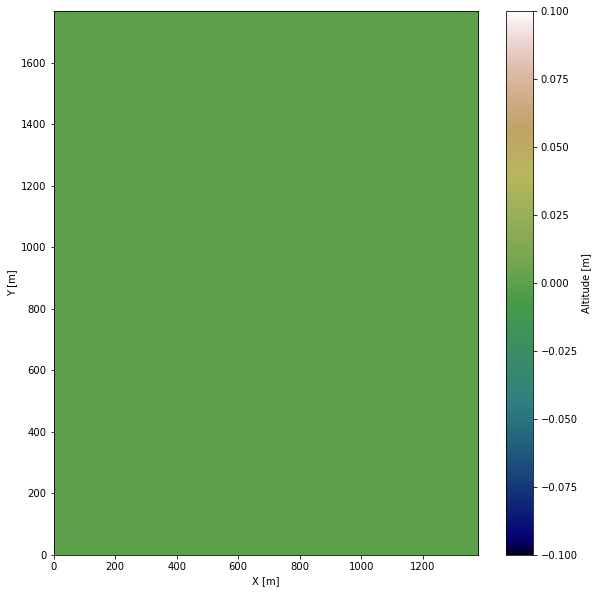

In [6]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(1, figsize=(10, 10))
im = plt.imshow(topo_raster, origin='lower', extent=[0, 1381, 0, 1768], cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('Altitude [m]')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_xlim(0, 1381)
ax.set_ylim(0, 1768)

### Saving the raster to disc

After the interpolation of the contour lines, the raster is saved to disc using `gg.raster.save_as_tiff()`. The function will not be executed as a raster is already provided with the example data. 

### Opening Raster

The previously computed and saved raster can now be opened using rasterio. 

In [7]:
topo_raster = rasterio.open(file_path + 'raster20.tif')

## Interface Points of stratigraphic boundaries

The interface points will be extracted from LineStrings digitized from the georeferenced map using QGIS. It is important to provide a formation name for each layer boundary. The vertical position of the interface point will be extracted from the digital elevation model using the `GemGIS` function `gg.vector.extract_xyz()`. The resulting GeoDataFrame now contains single points including the information about the respective formation. 


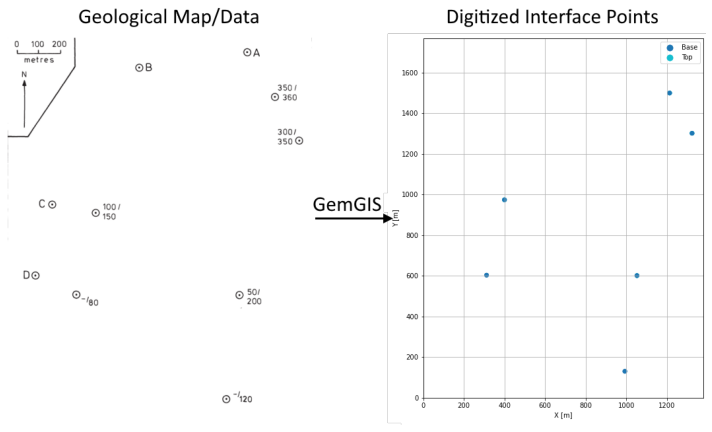

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../../docs/getting_started/images/interfaces_example20.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [9]:
interfaces = gpd.read_file(file_path + 'interfaces20.shp')
interfaces.head()

,id,formation,Z,geometry
0,None,Base,-80,POINT (311.718 603.282)
1,None,Base,-120,POINT (993.233 130.266)
2,None,Top,-50,POINT (1052.804 601.233)
3,None,Base,-200,POINT (1052.804 601.233)
4,None,Top,-100,POINT (399.981 974.235)


### Extracting Z coordinate from Digital Elevation Model

In [10]:
interfaces_coords = gg.vector.extract_xyz(gdf=interfaces, dem=None)
interfaces_coords = interfaces_coords.sort_values(by='formation', ascending=False)
interfaces_coords = interfaces_coords[interfaces_coords['formation'].isin(['Base', 'Top'])]
interfaces_coords.head()

,formation,Z,geometry,X,Y
2,Top,-50.00,POINT (1052.804 601.233),1052.80,601.23
4,Top,-100.00,POINT (399.981 974.235),399.98,974.24
6,Top,-300.00,POINT (1324.290 1301.740),1324.29,1301.74
8,Top,-350.00,POINT (1213.755 1499.718),1213.76,1499.72
0,Base,-80.00,POINT (311.718 603.282),311.72,603.28


### Plotting the Interface Points

(0.0, 1768.0)

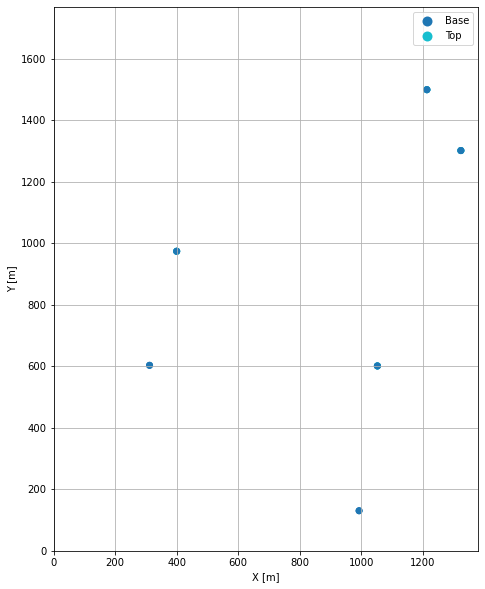

In [11]:
fig, ax = plt.subplots(1, figsize=(10, 10))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
interfaces_coords.plot(ax=ax, column='formation', legend=True, aspect='equal')
plt.grid()
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_xlim(0, 1381)
ax.set_ylim(0, 1768)

## Orientations from Borehole Observations

Orientations of the sill will be calculated as it was a three point problem with `calculate_orientation_for_three_point_problem()`.



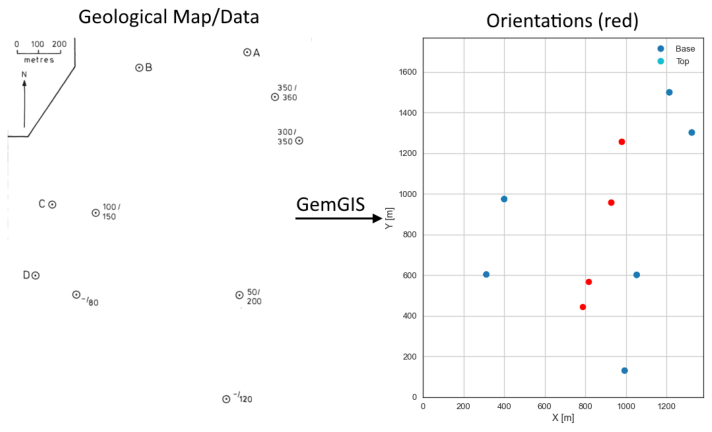

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../../docs/getting_started/images/orientations_example20.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [13]:
interfaces

,id,formation,Z,geometry
0,None,Base,-80,POINT (311.718 603.282)
1,None,Base,-120,POINT (993.233 130.266)
2,None,Top,-50,POINT (1052.804 601.233)
3,None,Base,-200,POINT (1052.804 601.233)
4,None,Top,-100,POINT (399.981 974.235)
5,None,Base,-150,POINT (399.981 974.235)
6,None,Top,-300,POINT (1324.290 1301.740)
7,None,Base,-350,POINT (1324.290 1301.740)
8,None,Top,-350,POINT (1213.755 1499.718)
9,None,Base,-360,POINT (1213.755 1499.718)


### Calculate Orientations for each formation

In [14]:
interfaces_base = interfaces[interfaces['formation'] == 'Base'].reset_index()
interfaces_base

,index,id,formation,Z,geometry
0,0,None,Base,-80,POINT (311.718 603.282)
1,1,None,Base,-120,POINT (993.233 130.266)
2,3,None,Base,-200,POINT (1052.804 601.233)
3,5,None,Base,-150,POINT (399.981 974.235)
4,7,None,Base,-350,POINT (1324.290 1301.740)
5,9,None,Base,-360,POINT (1213.755 1499.718)


In [15]:
orientations1 = gg.vector.calculate_orientation_for_three_point_problem(gdf=interfaces_base.loc[:2])
orientations1['Z'] = orientations1['Z'].astype(float)
orientations1['azimuth'] = orientations1['azimuth'].astype(float)
orientations1['dip'] = orientations1['dip'].astype(float)
orientations1['dip'] = 180 - orientations1['dip']
orientations1['azimuth'] = 180 - orientations1['azimuth']
orientations1['polarity'] = orientations1['polarity'].astype(float)
orientations1['X'] = orientations1['X'].astype(float)
orientations1['Y'] = orientations1['Y'].astype(float)
orientations1

,Z,formation,azimuth,dip,polarity,X,Y,geometry
0,-133.33,Base,312.61,12.44,1.00,785.92,444.93,POINT (785.918 444.927)


In [16]:
orientations2 = gg.vector.calculate_orientation_for_three_point_problem(gdf=interfaces_base.loc[1:3])
orientations2['azimuth'] = 360-orientations2['azimuth']
orientations2

,Z,formation,azimuth,dip,polarity,X,Y,geometry
0,-156.67,Base,312.69,12.42,1,815.34,568.58,POINT (815.339 568.578)


In [17]:
orientations3 = gg.vector.calculate_orientation_for_three_point_problem(gdf=interfaces_base.loc[2:4])
orientations3['Z'] = orientations3['Z'].astype(float)
orientations3['azimuth'] = orientations3['azimuth'].astype(float)
orientations3['dip'] = orientations3['dip'].astype(float)
orientations3['dip'] = 180 - orientations3['dip']
orientations3['azimuth'] = 180 - orientations3['azimuth']
orientations3['polarity'] = orientations3['polarity'].astype(float)
orientations3['X'] = orientations3['X'].astype(float)
orientations3['Y'] = orientations3['Y'].astype(float)
orientations3

,Z,formation,azimuth,dip,polarity,X,Y,geometry
0,-233.33,Base,312.84,12.52,1.00,925.69,959.07,POINT (925.692 959.069)


In [18]:
orientations4 = gg.vector.calculate_orientation_for_three_point_problem(gdf=interfaces_base.loc[3:5])
orientations4['Z'] = orientations4['Z'].astype(float)
orientations4['azimuth'] = orientations4['azimuth'].astype(float)
orientations4['dip'] = orientations4['dip'].astype(float)
orientations4['dip'] = 180 - orientations4['dip']
orientations4['azimuth'] = 180 - orientations4['azimuth']
orientations4['polarity'] = orientations4['polarity'].astype(float)
orientations4['X'] = orientations4['X'].astype(float)
orientations4['Y'] = orientations4['Y'].astype(float)
orientations4

,Z,formation,azimuth,dip,polarity,X,Y,geometry
0,-286.67,Base,310.80,12.35,1.00,979.34,1258.56,POINT (979.342 1258.564)


In [19]:
interfaces_top = interfaces[interfaces['formation'] == 'Top'].reset_index()
interfaces_top

,index,id,formation,Z,geometry
0,2,None,Top,-50,POINT (1052.804 601.233)
1,4,None,Top,-100,POINT (399.981 974.235)
2,6,None,Top,-300,POINT (1324.290 1301.740)
3,8,None,Top,-350,POINT (1213.755 1499.718)


In [20]:
orientations5 = gg.vector.calculate_orientation_for_three_point_problem(gdf=interfaces_top.loc[0:2])
orientations5['azimuth'] = 360 - orientations5['azimuth']
orientations5

,Z,formation,azimuth,dip,polarity,X,Y,geometry
0,-150.0,Top,341.77,18.43,1,925.69,959.07,POINT (925.692 959.069)


In [21]:
orientations6 = gg.vector.calculate_orientation_for_three_point_problem(gdf=interfaces_top.loc[1:3])
orientations6['azimuth'] = 180 - orientations6['azimuth']
orientations6['dip'] = 180 - orientations6['dip']
orientations6

,Z,formation,azimuth,dip,polarity,X,Y,geometry
0,-250.0,Top,341.23,18.22,1,979.34,1258.56,POINT (979.342 1258.564)


In [22]:
orientations7 = gg.vector.calculate_orientation_for_three_point_problem(gdf=interfaces_top.loc[[0, 2, 3]])
orientations7['azimuth'] = 180 - orientations7['azimuth']
orientations7['dip'] = 180 - orientations7['dip']
orientations7

,Z,formation,azimuth,dip,polarity,X,Y,geometry
0,-233.33,Top,340.65,18.41,1,1196.95,1134.23,POINT (1196.950 1134.230)


In [23]:
orientations8 = gg.vector.calculate_orientation_for_three_point_problem(gdf=interfaces_top.loc[[0, 1, 3]])
orientations8['azimuth'] = 360 - orientations8['azimuth']
orientations8

,Z,formation,azimuth,dip,polarity,X,Y,geometry
0,-166.67,Top,341.82,18.36,1,888.85,1025.06,POINT (888.847 1025.062)


### Merging Orientations

In [24]:
import pandas as pd
orientations = pd.concat([orientations1, orientations2, orientations3, orientations4, orientations5, orientations6, orientations7, orientations8]).reset_index()
orientations = orientations[orientations['formation'].isin(['Base', 'Top'])]
orientations['Z'] = orientations['Z'].astype(float)
orientations['azimuth'] = orientations['azimuth'].astype(float)
orientations['dip'] = orientations['dip'].astype(float)
orientations['polarity'] = orientations['polarity'].astype(float)
orientations['X'] = orientations['X'].astype(float)
orientations['Y'] = orientations['Y'].astype(float)
orientations

,index,Z,formation,azimuth,dip,polarity,X,Y,geometry
0,0,-133.33,Base,312.61,12.44,1.00,785.92,444.93,POINT (785.918 444.927)
1,0,-156.67,Base,312.69,12.42,1.00,815.34,568.58,POINT (815.339 568.578)
2,0,-233.33,Base,312.84,12.52,1.00,925.69,959.07,POINT (925.692 959.069)
3,0,-286.67,Base,310.80,12.35,1.00,979.34,1258.56,POINT (979.342 1258.564)
4,0,-150.00,Top,341.77,18.43,1.00,925.69,959.07,POINT (925.692 959.069)
5,0,-250.00,Top,341.23,18.22,1.00,979.34,1258.56,POINT (979.342 1258.564)
6,0,-233.33,Top,340.65,18.41,1.00,1196.95,1134.23,POINT (1196.950 1134.230)
7,0,-166.67,Top,341.82,18.36,1.00,888.85,1025.06,POINT (888.847 1025.062)


### Plotting the Orientations

(0.0, 1768.0)

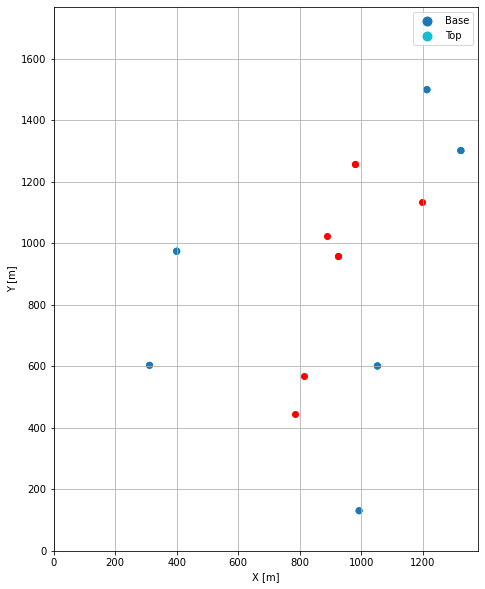

In [25]:
fig, ax = plt.subplots(1, figsize=(10, 10))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
interfaces_coords.plot(ax=ax, column='formation', legend=True, aspect='equal')
orientations.plot(ax=ax, color='red', aspect='equal')
plt.grid()
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_xlim(0, 1381)
ax.set_ylim(0, 1768)

## GemPy Model Construction

The structural geological model will be constructed using the `GemPy` package. 

In [26]:
import gempy as gp

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Creating new Model

In [27]:
geo_model = gp.create_model('Model20')
geo_model

Model20  2021-04-29 09:37

### Initiate Data

In [28]:
gp.init_data(geo_model, [0, 1381, 0, 1768, -500, 250], [100, 100, 100],
             surface_points_df=interfaces_coords[interfaces_coords['Z'] != 0],
             orientations_df=orientations,
             default_values=True)

Active grids: ['regular']


Model20  2021-04-29 09:37

### Model Surfaces

In [29]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Top,Default series,1,#015482,1
1,Base,Default series,2,#9f0052,2


### Mapping the Stack to Surfaces

In [30]:
gp.map_stack_to_surfaces(geo_model,
                         {
                          'Strata1': ('Top'),   
                          'Strata2': ('Base'),
                         },
                         remove_unused_series=True)
geo_model.add_surfaces('Basement')

,surface,series,order_surfaces,color,id
0,Top,Strata1,1,#015482,1
1,Base,Strata2,1,#9f0052,2
2,Basement,Strata2,2,#ffbe00,3


### Showing the Number of Data Points

In [31]:
gg.utils.show_number_of_data_points(geo_model=geo_model)

,surface,series,order_surfaces,color,id,No. of Interfaces,No. of Orientations
0,Top,Strata1,1,#015482,1,4,4
1,Base,Strata2,1,#9f0052,2,6,4
2,Basement,Strata2,2,#ffbe00,3,0,0


### Loading Digital Elevation Model

In [32]:
geo_model.set_topography(
    source='gdal', filepath=file_path + 'raster20.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   6.905     ,    8.84      , -496.25      ],
       [   6.905     ,    8.84      , -488.75      ],
       [   6.905     ,    8.84      , -481.25      ],
       ...,
       [1377.07670455, 1735.97101449,    0.        ],
       [1377.07670455, 1748.7826087 ,    0.        ],
       [1377.07670455, 1761.5942029 ,    0.        ]])

### Plotting Input Data

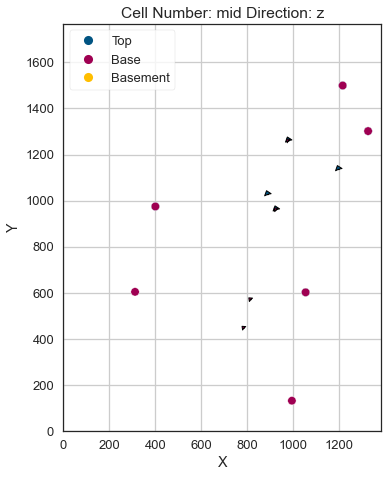

In [33]:
gp.plot_2d(geo_model, direction='z', show_lith=False, show_boundaries=False)
plt.grid()

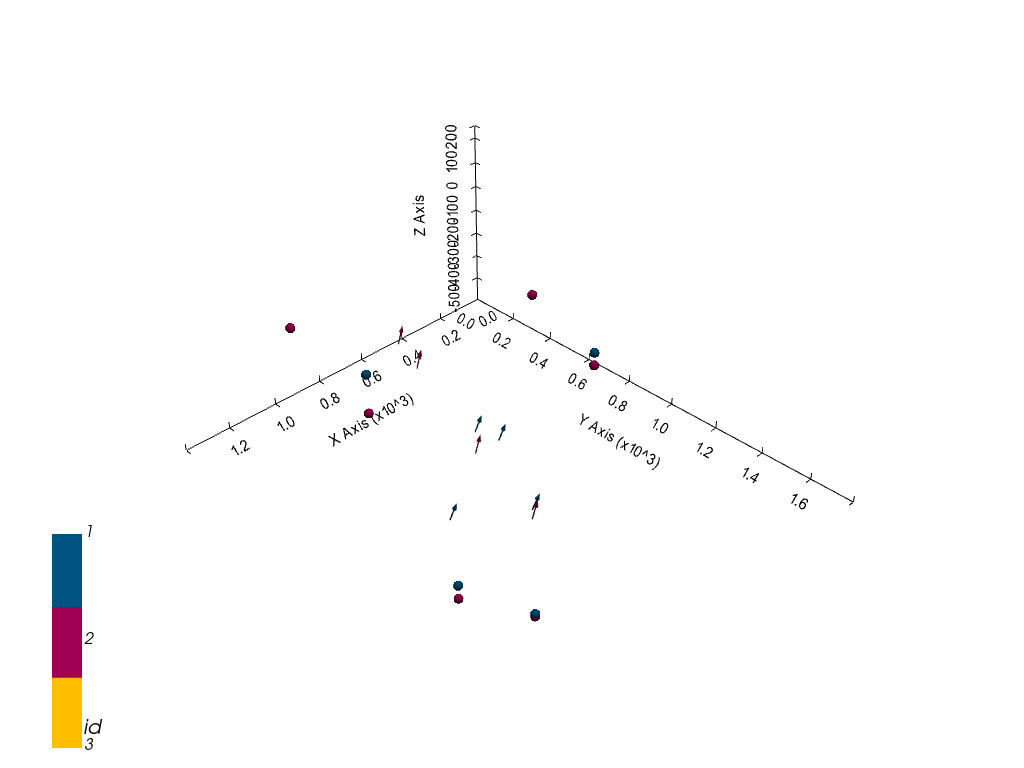

In [34]:
gp.plot_3d(geo_model, image=False, plotter_type='basic', notebook=True)

### Setting the Interpolator

In [35]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging=False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                    values
range             2365.48
$C_o$           133225.83
drift equations    [3, 3]


### Computing Model

In [36]:
sol = gp.compute_model(geo_model, compute_mesh=True)

### Plotting Cross Sections

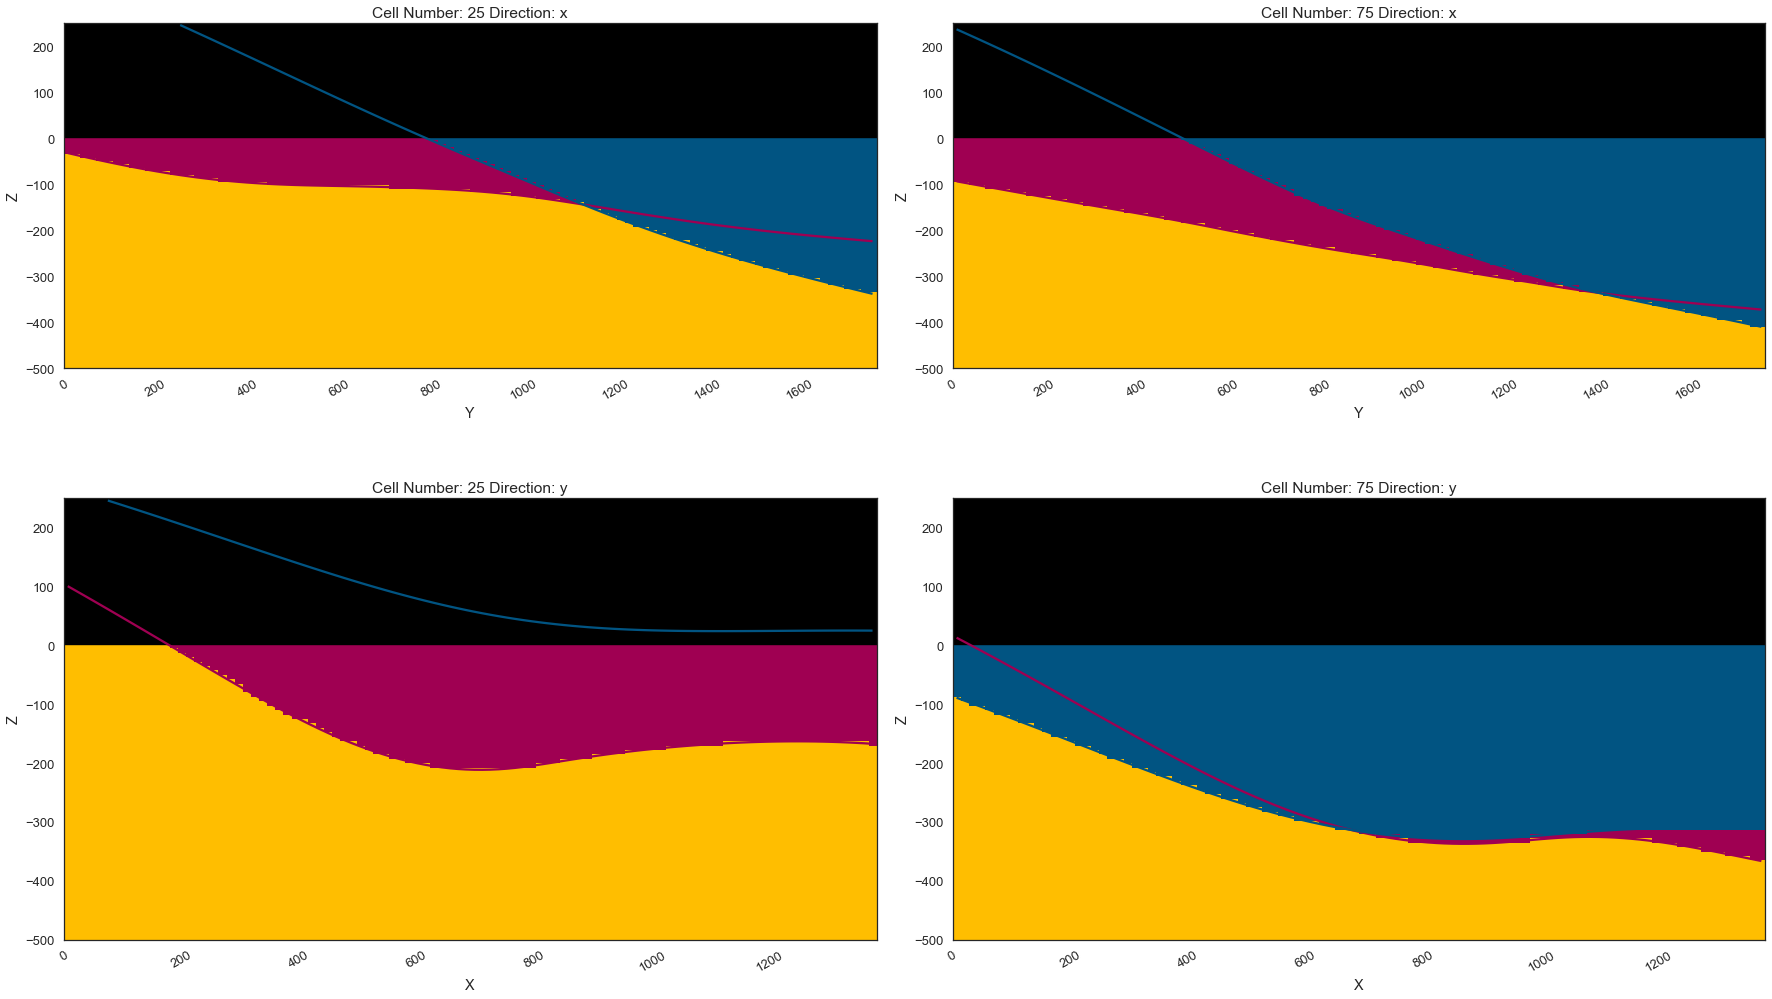

In [37]:
gp.plot_2d(geo_model, direction=['x', 'x', 'y', 'y'], cell_number=[25, 75, 25, 75], show_topography=True, show_data=False)

### Plotting 3D Model

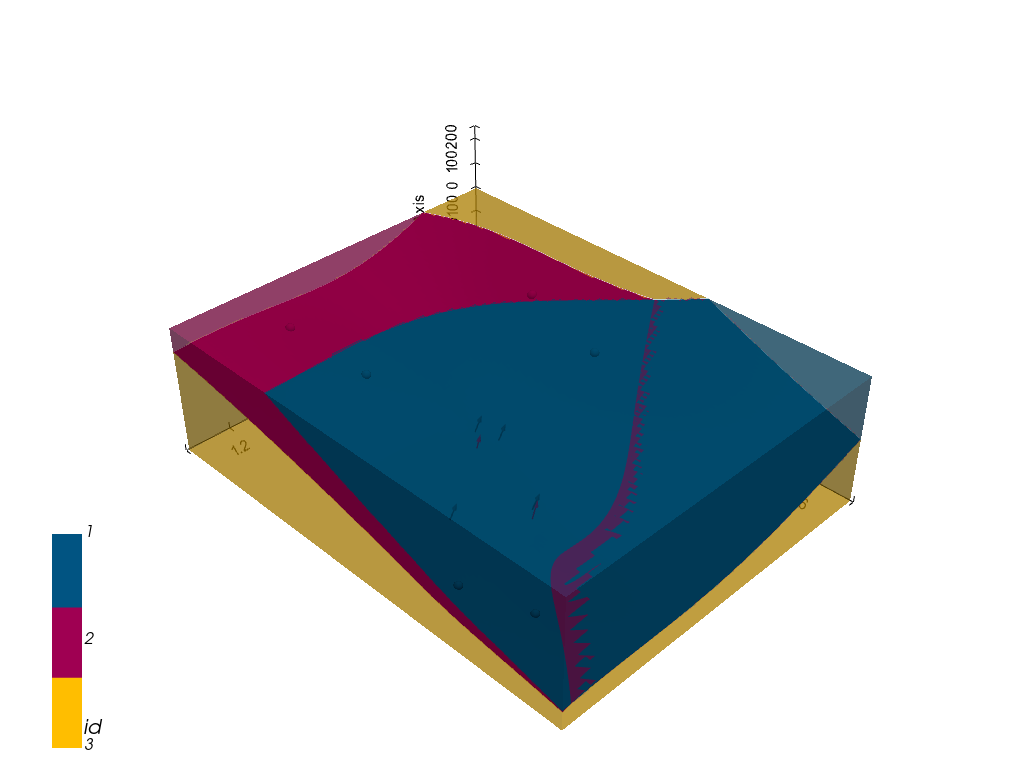

In [38]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=False,
                 plotter_type='basic', notebook=True, show_lith=True)